In [12]:
import numpy as np
import pandas as pd
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

# 1.	Many mobile applications provide a way to screen incoming SMS as spam. With 95% accuracy the company is able to classify sms as spam or ham. And there is always space for improvement. Your task is to use any of the machine learning models to improve the accuracy of the model to above 96%

# a.	Use encoding=’cp1252’ while reading the data (spam.csv) using pandas, since this data set contains other languages

In [89]:
spam=pd.read_csv("D:\\Downloads\\spam.csv",encoding='cp1252')

In [90]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
spam['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [106]:
spam_df = spam[spam['label'] == 'spam'] #create sub-dataframe of spam text
ham_df = spam[spam['label'] == 'ham']

In [108]:
from nltk.corpus import stopwords

In [109]:
stop_words = set(stopwords.words('english'))
def wordCount(text):
    try:
        text = text.lower()
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        txt = regex.sub(' ',text)  #remove punctuation
        words = [w for w in txt.split(' ')\
                if not w in stop_words and len(w)>3] # remove stop words and words with length smaller than 3 letters
        return len(words)
    except:
        return 0

In [110]:
spam_df['len'] = spam_df['text'].apply(lambda x: len([w for w in x.split(' ')]))
ham_df['len'] = ham_df['text'].apply(lambda x: len([w for w in x.split(' ')]))
spam_df['processed_len'] = spam_df['text'].apply(lambda x: wordCount(x))
ham_df['processed_len'] = ham_df['text'].apply(lambda x: wordCount(x))

D:\New folder (3)\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\New folder (3)\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\New folder (3)\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [126]:
import re
import string
from nltk.corpus import stopwords
from collections import Counter

In [128]:
def tokenize(text):
    exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [129]:
spam_df['tokens'] = spam_df['text'].map(tokenize)
ham_df['tokens'] = ham_df['text'].map(tokenize)

D:\New folder (3)\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\New folder (3)\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token #combine text in different columns in one list
ham_words = []
for token in ham_df['tokens']:
    ham_words += token

In [131]:
spam_count = Counter(spam_words).most_common(10)
ham_count = Counter(ham_words).most_common(10)

In [132]:
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

In [134]:
spam['tokens'] = spam['text'].map(tokenize)

In [136]:
def text_join(text):
    return " ".join(text)
spam['text'] = spam['tokens'].apply(text_join)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [153]:
tv = TfidfVectorizer('english')
features = tv.fit_transform(spam['text'])
target = spam.label.map({'ham':0, 'spam':1})

In [154]:
n_folds = 5
def f1_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 100).get_n_splits(features)
    f1 = cross_val_score(model, features, target, scoring = 'f1', cv = kf )
    return (f1)

In [155]:
rfc = RandomForestClassifier(n_estimators = 31, random_state = 100)

In [156]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

In [157]:
score = f1_cv(rfc)
print ('\nRandomForest score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


RandomForest score: 0.893616(0.014773)



In [158]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

In [159]:
def classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)
def predictor(clf, X_test):
    return (clf.predict(X_test))

In [161]:
clf = {'RandomForest':rfc}
preds = []
for key, value in clf.items():
    #print(key)
    classifier(value, X_train, y_train)
    pred = predictor(value,X_test)
    preds.append((key, [accuracy_score(y_test,pred)]))

In [162]:
preds

[('RandomForest', [0.9772727272727273])]

In [164]:
cr=metrics.classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1459
           1       0.98      0.84      0.90       213

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# 2.	Bag of word analysis

2.	Bag of word analysis
a.	Read the labelled dataset (sentiment_amazon.csv). Positive sentiment are encoded as 1s and negative sentiments are encoded as 0s
b.	Create a word cloud using positive reviews alone and identify important terms that are frequently appearing
c.	Create a word cloud using negative reviews alone and identify important terms that are frequently appearing. Identify some products which are very frequently appearing in negative reviews


In [2]:
amazon_path=("D:\\Downloads\\sentiment_amazon.csv")
amazon = pd.read_csv(amazon_path)
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [3]:
amazon.shape

(771, 2)

In [5]:
amazon['sentiment'].value_counts()

1    387
0    384
Name: sentiment, dtype: int64

In [ ]:
custom_stop_words = []
common_stop_words = nltk.corpus.stopwords.words('english')
stop_words_all = np.hstack([custom_stop_words, common_stop_words])
len(stop_words_all)

from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer()

In [11]:
doc_clean= amazon['review'].str.lower().str.replace('[^a-z #@]','')
stopwords=nltk.corpus.stopwords.words('english')
#doc_clean=doc.str.replace('[^a-z #@]','')
def row_clean(row):
    stopwords=nltk.corpus.stopwords.words('english')
    custom_stopwords=['rt','amp']
    stopwords.extend(custom_stopwords)
    words=row.split(' ')
    words_clean=[word for word in words if word not in stopwords]
    return' '.join(words_clean)

doc_clean=amazon['review'].str.lower().str.replace('[^a-z #@]','')
doc_clean=doc_clean.apply(row_clean)
doc_clean.head()

0                      way plug us unless go converter
1                                        great jawbone
2    tied charger conversations lasting  minutesmaj...
3                                            mic great
4         jiggle plug get line right get decent volume
Name: review, dtype: object

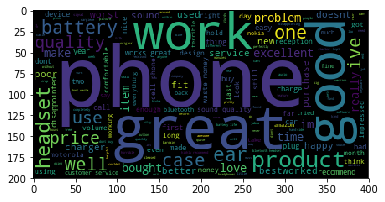

In [39]:
wc=WordCloud().generate(' '.join(doc_clean.values))
plt.imshow(wc)

In [13]:
# create a doc term matrix rows will be columns and col will be rows

cv=CountVectorizer()
cv.fit(doc_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
dtm_sparse=cv.transform(doc_clean) # bcz the dim is quite high bcz it might cause memory  error
dtm_matrix=dtm_sparse.toarray()#.toarray sparse o 2D array

df_dtm=pd.DataFrame(dtm_matrix, columns=cv.get_feature_names())
print(df_dtm.shape)
df_dtm.head()

(771, 1284)


,ability,able,abound,abovepretty,absolutel,absolutely,ac,accept,acceptable,accessable,...,wrong,wrongfirst,year,years,yes,yet,youd,youll,za,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
model= KMeans(n_clusters=2,random_state=100)
model.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

b.	Create a word cloud using positive reviews alone and identify important terms that are frequently appearing

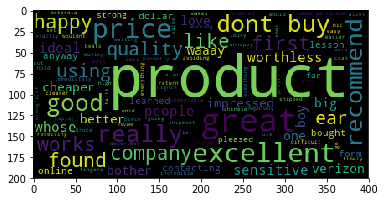

In [18]:
amazon['positive_Review']=model.labels_
cluster_0_index=amazon[amazon['positive_Review']==1].index
wc=WordCloud(stopwords=stopwords).generate(' '.join(doc_clean.loc[cluster_0_index]))
plt.imshow(wc)

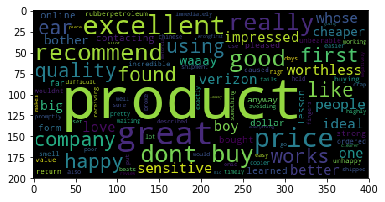

In [27]:
amazon['Review']=model.labels_
cluster_0_index=amazon[amazon['Review']==1].index
wc=WordCloud(stopwords=stopwords).generate(' '.join(doc_clean.loc[cluster_0_index]))
plt.imshow(wc)

In [ ]:
#The words that are frequently appearing in positive reviews are product, excellent, recommended, quality, happy, great,cheaper

C.Create a word cloud using negative reviews alone and identify important terms that are frequently appearing. Identify some products which are very frequently appearing in negative reviews


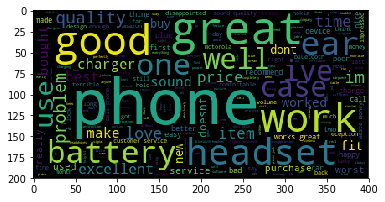

In [26]:
amazon['negative_Review']=model.labels_
cluster_1_index=amazon[amazon['negative_Review']==0].index

wc=WordCloud().generate(' '.join(doc_clean.loc[cluster_1_index]))
plt.imshow(wc)

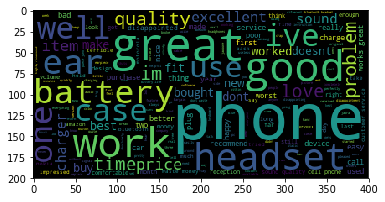

In [20]:
amazon['Review']=model.labels_
cluster_1_index=amazon[amazon['Review']==0].index

wc=WordCloud().generate(' '.join(doc_clean.loc[cluster_1_index]))
plt.imshow(wc)

In [ ]:
#The words that are frequently appearing in the negative reviews are probelem,work,bad,battery,charger,price,time,quality,sound
#The products that are frequently appearing in negative reviews are phone,battery,headset
#there are more no of positive reviews

# 3.	Without cleaning the dataset, identify sentiment for each review using VADER package in nltk. This is unsupervised prediction, hence you will not be using the labelled column

# unsupervised way of sentiment analysis

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Varshini
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

D:\New folder (3)\anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
senti = SentimentIntensityAnalyzer()
amazon['sentiment_score']=amazon['review'].apply(senti.polarity_scores)
amazon['sentiment_score'].head()

0    {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...
1    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
2    {'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'comp...
3    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment_score, dtype: object

In [33]:
amazon['sentiment_score']=amazon['review'].apply( lambda v: senti.polarity_scores(v)['compound'])
amazon['sentiment_score'].head()

0   -0.3535
1    0.6249
2   -0.6145
3    0.6249
4    0.0000
Name: sentiment_score, dtype: float64

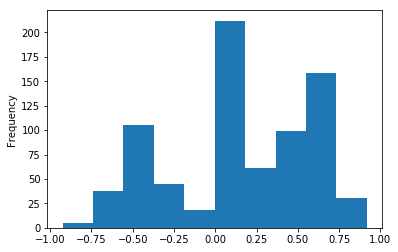

In [34]:
amazon['sentiment_score'].plot.hist()

In [62]:
def assign_sentiment(score):
    if score > 0.5:
        return 'Positive'
    else:
        return 'Negative'

In [63]:
amazon['sentiment_vader']=amazon['sentiment_score'].apply(assign_sentiment)
amazon['sentiment_vader'].value_counts()

Negative    569
Positive    202
Name: sentiment_vader, dtype: int64

In [64]:
assign_sentiment(0.95)

'Positive'

In [65]:
assign_sentiment(-0.01)

'Negative'

# 4.	Apply Random Forest or Adaboost model to treat this as an supervised model by using the labelled column

In [53]:
amazon['sentiment'].value_counts()

1    387
0    384
Name: sentiment, dtype: int64

In [50]:
doc = amazon['review'].str.lower().str.replace('[^a-z #@]','') # HERE CLANING HAS TO BE DONE BCZ we need a dtm matrix

def clean_row(row):
    row_words = row.split(' ')
    words_clean = [word for word in row_words if word not in stopwords]
    return ' '.join(words_clean)
doc_clean= doc_clean.apply(clean_row)


In [51]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(doc_clean,test_size=0.3,random_state=100)
train_rows= train.index
test_rows=test.index


In [52]:
cv=CountVectorizer()
cv.fit(doc_clean.loc[train_rows])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [54]:
train_dtm_sparse=cv.transform(train)
train_dtm_matrix=train_dtm_sparse.toarray()
train_df_dtm= pd.DataFrame(train_dtm_matrix,columns=cv.get_feature_names())

train_x=train_df_dtm
train_y=amazon.loc[train_rows,'sentiment']

test_dtm_sparse=cv.transform(test)
test_dtm_matrix=test_dtm_sparse.toarray()
test_df_dtm= pd.DataFrame(test_dtm_matrix,columns=cv.get_feature_names())

test_x=test_df_dtm
test_y=amazon.loc[test_rows,'sentiment']


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

In [58]:
rf_model=RandomForestClassifier(n_estimators=300,random_state=100)
rf_model.fit(train_x,train_y)
pred_sentiment=rf_model.predict(test_x)
accuracy_score(test_y, pred_sentiment)

0.8189655172413793

In [68]:
dt_model=DecisionTreeClassifier(max_depth=19)
dt_model.fit(train_x,train_y)
pred_sentiment=dt_model.predict(test_x)
accuracy_score(test_y, pred_sentiment)

0.7370689655172413

In [59]:
adaboost_model=AdaBoostClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)
pred_sentiment=adaboost_model.predict(test_x)
accuracy_score(test_y, pred_sentiment)

0.8103448275862069

In [60]:
train_x_nb=train_x>=1
train_x_nb=train_x_nb.replace({True:1, False: 0})

test_x_nb=test_x >=1
test_x_nb=test_x_nb.replace({True:1,False:0})

In [66]:
nb_model = GaussianNB()
nb_model.fit(train_x_nb, train_y)
pred_sentiment = nb_model.predict(test_x_nb)
accuracy_score(test_y,pred_sentiment)

0.6853448275862069

In [67]:
nb_model = GaussianNB()
nb_model.fit(train_x, train_y)
pred_sentiment = nb_model.predict(test_x)
accuracy_score(test_y,pred_sentiment)

0.6896551724137931

# 5.	Using KMeans algorithm cluster the reviews in to two groups. Create wordclouds separately for each cluster. Using the word cloud, see if you can identify which cluster could be for positive and negative reviews 

In [15]:
model= KMeans(n_clusters=2,random_state=100)
model.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

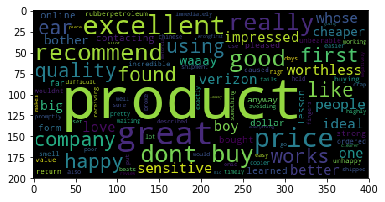

In [27]:
amazon['Review']=model.labels_
cluster_0_index=amazon[amazon['Review']==1].index
wc=WordCloud(stopwords=stopwords).generate(' '.join(doc_clean.loc[cluster_0_index]))
plt.imshow(wc)

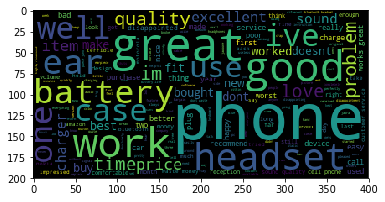

In [20]:
amazon['Review']=model.labels_
cluster_1_index=amazon[amazon['Review']==0].index

wc=WordCloud().generate(' '.join(doc_clean.loc[cluster_1_index]))
plt.imshow(wc)

In [69]:
amazon['Review'].value_counts()

0    730
1     41
Name: Review, dtype: int64

In [ ]:
#cluster 0 seems to be positive because it consists of great,recommended, happy, excellent 
#cluster 1 seems to be negative because it consists of work,problem,dont,worst
# but the clusters are not defined it is found that there is a overlap in the clusters
#and the counts after clustering is not same as the original sentiments
before clustering
1    387
0    384
after clustering
0    730
1     41

# 6.	Compare the accuracy of supervised and unsupervised using VADER, unsupervised using KMeans, and comment on which one gives the best result

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()
hotstar['sentiment_vader'] = hotstar['Reviews'].apply(lambda v: 
                                                      senti.polarity_scores(v)['compound'])
def assign_sentiment(v):
    if v > 0.25:
        return 'Positive'
    elif v < -0.25:
        return 'Negative'
    else:
        return 'Neutral'
hotstar['sentiment_vader'] = hotstar['sentiment_vader'].apply(assign_sentiment)
test_hotstar = hotstar.iloc[test_y.index]
(test_hotstar['Sentiment_Manual'] == 
 test_hotstar['sentiment_vader']).sum() / test_hotstar.shape[0] * 100

#### in supervised model on performing various models it is found that random forest has the highest accuracy
#### in unsupervised model the sentiments using vader are
Negative    569
Positive    202
#### whereas in the original data it has
1    387
0    384
#### in unsupervised model there is a overlap in the clusters
0    730
1     41

### based on the above results it is found that the supervised model gives the best result among others